# Taller 2

## Métodos Computacionales 2

Instrucciones: Suba el jupyter notebook **.ipynb** en la actividad de bloque neon. El archivo debe ser nombrado ApellidoNombreApellidoNombre_Taller2.ipynb, con el primer Apellido y Nombre de cada integrante de la pareja. **El archivo debe poder correr en el binder del curso o en google colab**

Si un ejercicio demora **más de 10 segundos** en correr se considerará **incorrecto**.

La simulación no debe demorar más de **30 segundos** en compilar y correr.

No modifique el cuaderno, ni los modos de lectura de los archivos.

**Entrega: Jueves 7 de Septiembre 11:59 pm**

## Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.io import wavfile
from IPython.display import Audio
import matplotlib.animation as ani
plt.style.use('dark_background')

In [2]:
from matplotlib import rc
rc("animation", html = "jshtml")

### Problema 1

Considere el siguiente conjunto de datos que corresponde a la magnitud de un temblor en la escala de Ricther, tomado en un tiempo de 1 día.

Estos datos fueron tomados de "Earthquake harzard Program", https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php.

A continuación se realiza un gráfico de la magnitud del temblor en la escala de Ricther.

Text(0.5, 0, 'time')

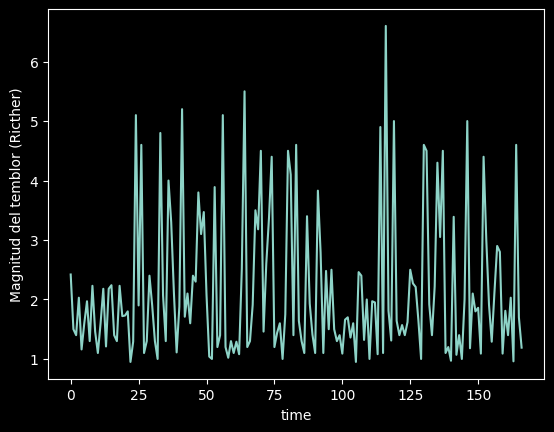

In [3]:
## lectura del archivo del temblor (no modificar)
earth_quake_data = pd.read_csv("https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/1.0_day.csv")
magnitude = earth_quake_data["mag"].to_numpy()

plt.plot(np.arange(len(magnitude)), magnitude)
plt.ylabel("Magnitud del temblor (Ricther)")
plt.xlabel("time")

a) Realice un gráfico del espacio de frecuencias del temblor. Usando **plt.stem()**

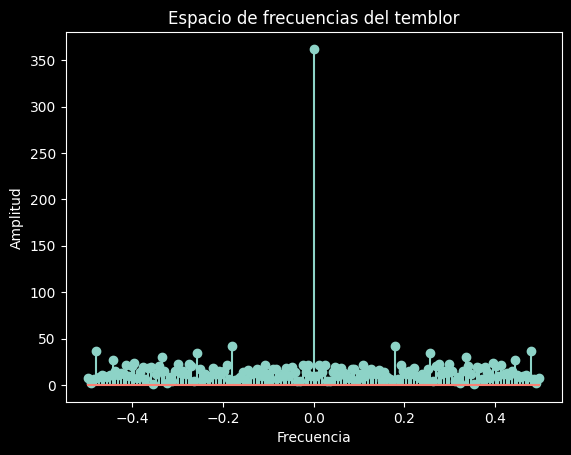

In [4]:
## a) Realice un gráfico del espacio de frecuencias del temblor. Usando **plt.stem()**
amplitud = np.fft.fft(magnitude)
freq = np.fft.fftfreq(len(magnitude))
plt.figure()
plt.stem(freq, np.abs(amplitud))
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")
plt.title("Espacio de frecuencias del temblor")
plt.show()



b) Incluya en el gráfico anterior las 16 frecuencias más importantes del temblor usando **plt.stem()** con otro color. Es decir gráfique las amplitudes de las 16 frecuencias más importantes que describen el temblor de un color y las otras frecuencias de otro color.

In [5]:
data = {"Amplitud": np.abs(amplitud), "Frecuencia": freq}
df = pd.DataFrame(data)

# get top 16 frequencies
df = df.sort_values(by = "Amplitud", ascending = False)
df_1 = df.iloc[0:15, :]
df_2 = df.iloc[16:, :]



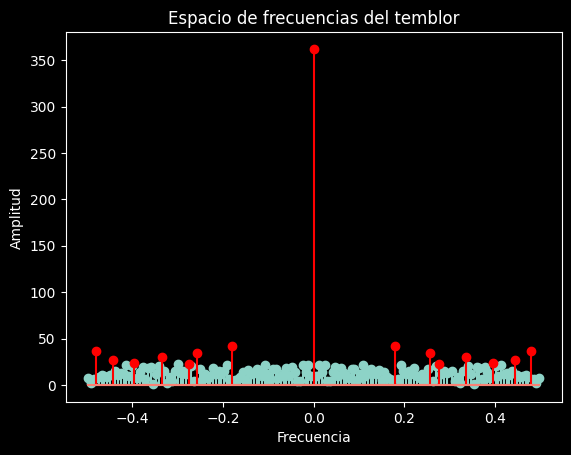

In [6]:
plt.stem(df_2["Frecuencia"], df_2["Amplitud"])
plt.stem(df_1["Frecuencia"], df_1["Amplitud"],  "r")
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")
plt.title("Espacio de frecuencias del temblor")
plt.show()

c) Reemplace las amplitudes de las 70 frecuencias más altas por cero, y grafique la magnitud del temblor sin estás frecuencias, también incluya el gráfico inicial en su plot.

In [7]:
df_70 = df.iloc[71:, :]


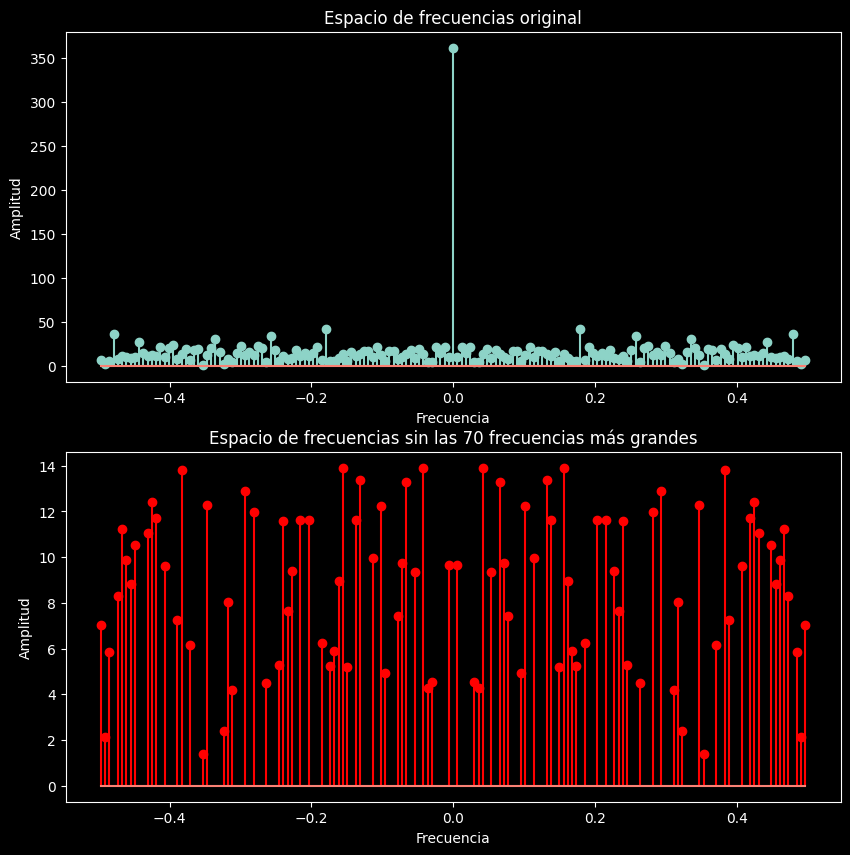

In [8]:
fig, axs = plt.subplots(2, 1, figsize = (10, 10))
axs[0].stem(df["Frecuencia"], df["Amplitud"])
axs[1].stem(df_70["Frecuencia"], df_70["Amplitud"], "r")
axs[0].set_xlabel("Frecuencia")
axs[0].set_ylabel("Amplitud")
axs[0].set_title("Espacio de frecuencias original")
axs[1].set_xlabel("Frecuencia")
axs[1].set_ylabel("Amplitud")
axs[1].set_title("Espacio de frecuencias sin las 70 frecuencias más grandes")
plt.show()

d) Usando la tranformada de Fourier, cálcule e imprima el promedio en escala de Ritcher del temblor

In [9]:
mean = np.mean(magnitude)

fourier_magnitude = np.fft.ifft(amplitud)
fourier_mean = np.mean(fourier_magnitude).real

print("Promedio Ritcher: ", mean)
print("Promedio Ritcher usando la transformada de Fourier: ", fourier_mean)

Promedio Ritcher:  2.169041916287425
Promedio Ritcher usando la transformada de Fourier:  2.1690419162874255


## Problema 2

En el github del curso encontrara un archivo de audio Thriller.wav. \\

Para leer el archivo este jupyter notebook debe estar en el directorio **Datafiles** del github. Es decir no modifique la forma de lectura del archivo.

Escriba un programa que realice los siguientes pasos:

*    Para leer los datos del archivo [Thriller.wav](https://github.com/diegour1/MetodosComputacionales2/blob/main/Datafiles/Thriller.wav). Use el siguiente comando para leer los datos
```
sr, x = wavfile.read("Thriller.wav")
```

Para leer el archivo, su notebook debe estar en la carpeta Datafiles en el github del curso.

In [10]:
# No modifique este codigo asi debe poder leerse su programa
sr, x = wavfile.read("Thriller.wav")
print(x[:, 0].shape)

(631919,)


In [11]:
len(x[:, 0])/sr

14.329229024943311

In [12]:
nyquist = sr/2

In [13]:
# ejemplo para escuchar el audio no modificar
Audio(x[:, 0], rate=sr)

a) Realice un gráfico de las amplitudes de las frecuencias haciendo de la transformada de Fourier del audio.

In [14]:
amplitud = np.fft.fft(x[:, 0])
freq = np.fft.fftfreq(len(x[:, 0]))


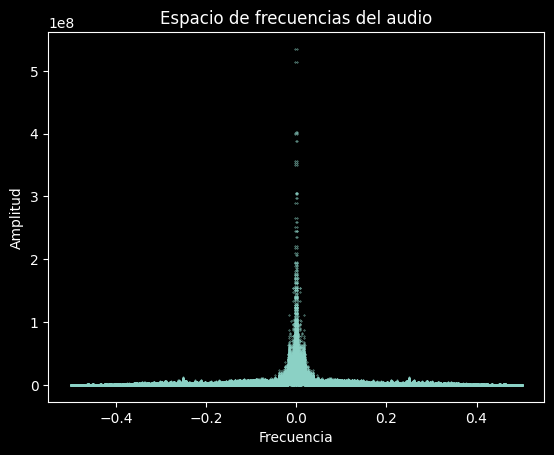

In [15]:
plt.figure()
plt.scatter(freq, np.abs(amplitud), s = 0.1)
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")
plt.title("Espacio de frecuencias del audio")
plt.show()

b) A partir del audio original elimine las 20000 frecuencias más bajas (asignandoles valores iguales a cero) del audio muestre el gráfico y reproduzca el audio.

In [16]:
data = {"Amplitud": np.abs(amplitud), "Frecuencia": freq}
df = pd.DataFrame(data)


In [17]:
df_copy = df.copy()
df_copy = df_copy.sort_values(by="Amplitud", ascending=True)
df_copy = df_copy.iloc[20000:, :]
min_freq = df_copy["Frecuencia"].min()

df_filtered = df.copy()
df_filtered.loc[df_filtered["Frecuencia"] < min_freq, "Amplitud"] = 0



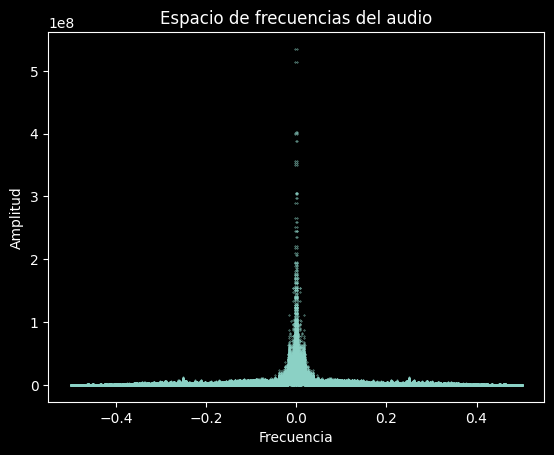

In [18]:
fig = plt.figure()
plt.scatter(df_filtered["Frecuencia"], df_filtered["Amplitud"], s = 0.1)
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")
plt.title("Espacio de frecuencias del audio")
plt.show()

In [19]:
# apply inverse fourier transform
filtered_amplitudes = df_filtered["Amplitud"] * np.exp(1j * np.angle(amplitud))
fourier_magnitude = np.fft.ifft(filtered_amplitudes).real.astype(np.int16)

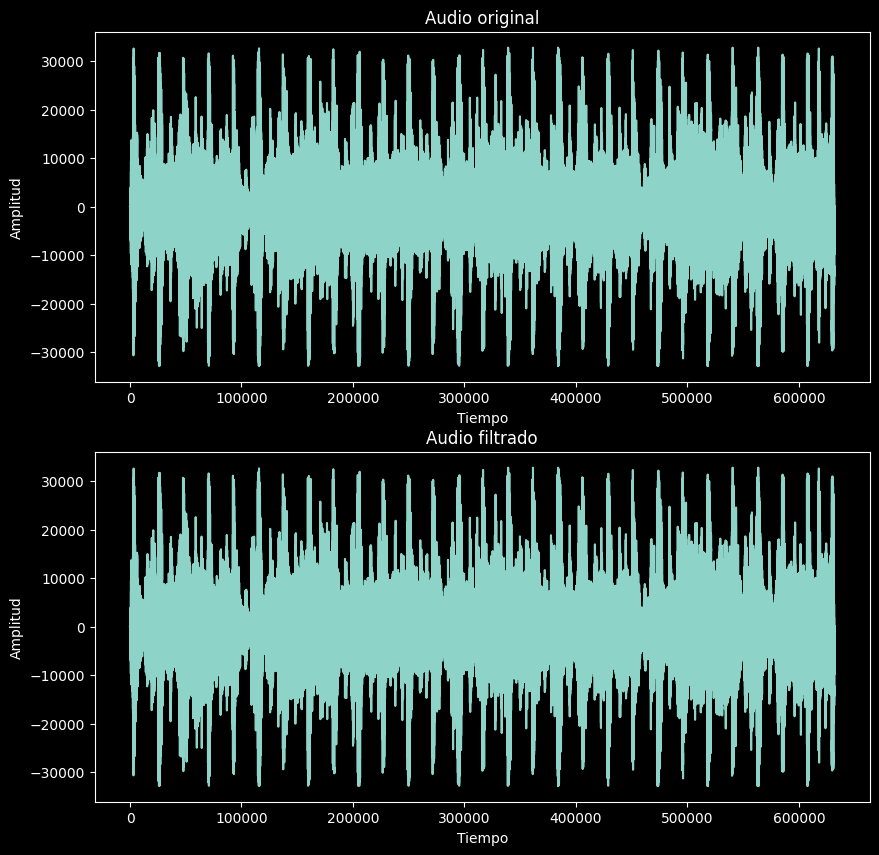

In [20]:
# plot original audio
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].plot(x[:, 0])
axs[0].set_xlabel("Tiempo")
axs[0].set_ylabel("Amplitud")
axs[0].set_title("Audio original")
axs[1].plot(fourier_magnitude)
axs[1].set_xlabel("Tiempo")
axs[1].set_ylabel("Amplitud")
axs[1].set_title("Audio filtrado")
plt.show()



In [21]:
# Audio sin frecuencias bajas
Audio(fourier_magnitude, rate=44100)

c) A partir del audio original elimine las frecuencias más altas (las complementarias del 20000 más bajas), muestre el gráfico y reproduzca el audio.

In [22]:
# remove top 20000 frequencies
df_copy = df.copy()
df_copy = df_copy.sort_values(by="Amplitud", ascending=False)
df_copy = df_copy.iloc[20000:, :]
max_freq = df_copy["Frecuencia"].max()

df_filtered = df.copy()
df_filtered.loc[df_filtered["Frecuencia"] > max_freq, "Amplitud"] = 0


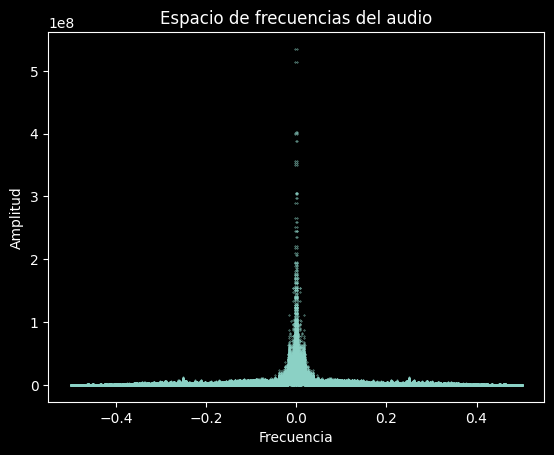

In [23]:
fig = plt.figure()
plt.scatter(df_filtered["Frecuencia"], df_filtered["Amplitud"], s = 0.1)
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")
plt.title("Espacio de frecuencias del audio")
plt.show()

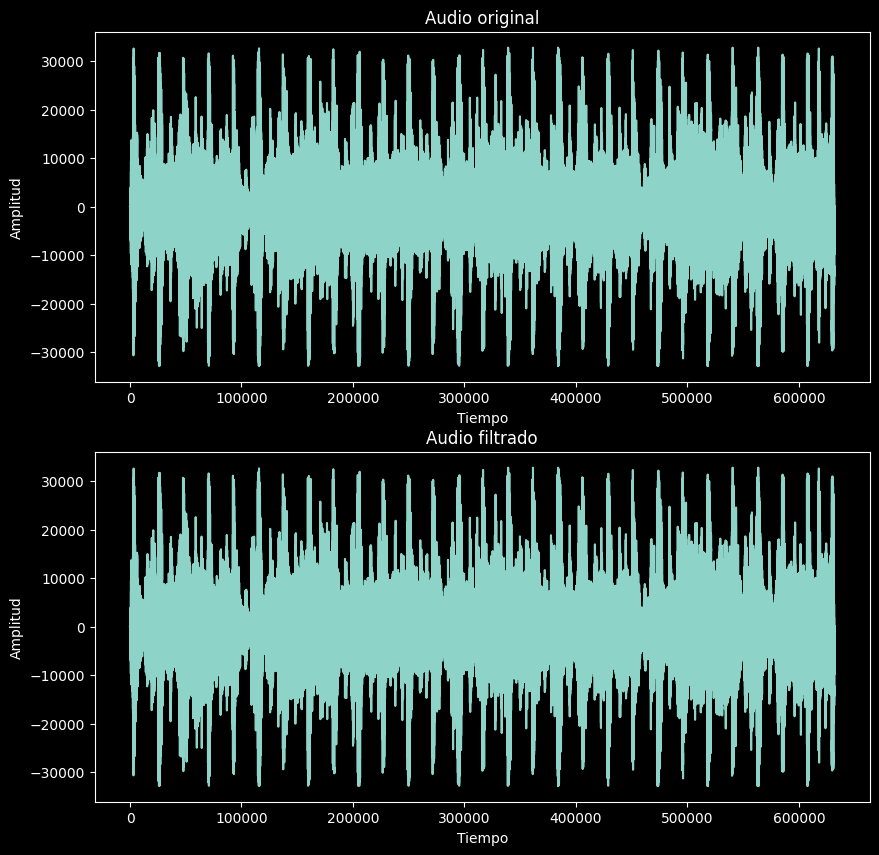

In [24]:

# apply inverse fourier transform
filtered_amplitudes = df_filtered["Amplitud"] * np.exp(1j * np.angle(amplitud))
fourier_magnitude = np.fft.ifft(filtered_amplitudes).real.astype(np.int16)

# plot original audio
fig, axs = plt.subplots(2, 1, figsize = (10, 10))
axs[0].plot(x[:, 0])
axs[0].set_xlabel("Tiempo")
axs[0].set_ylabel("Amplitud")
axs[0].set_title("Audio original")
axs[1].plot(fourier_magnitude)
axs[1].set_xlabel("Tiempo")
axs[1].set_ylabel("Amplitud")
axs[1].set_title("Audio filtrado")
plt.show()

In [25]:
# Audio sin frecuencias altas
Audio(fourier_magnitude, rate=44100)

d) Diseñe un método usando la transformada de Fourier que reproduzca la canción al revés.

In [26]:
def reverse_audio_with_fft(df, amplitud):
    # Create a copy of the DataFrame
    df_copy = df.copy()
    
    # Apply inverse Fourier transform with reversed amplitudes and phases with the negative sign
    reverse_amplitudes = df_copy["Amplitud"] * np.exp(-1j * np.angle(amplitud))
    reversed_audio = np.fft.ifft(reverse_amplitudes).real.astype(np.int16)
    
    return reversed_audio



In [27]:
# Reverse audio
reversed_audio = reverse_audio_with_fft(df, amplitud)
Audio(reversed_audio, rate=44100)

## Problema 3

En este problema vamos a considerar el paquete de onda unidimensional Gaussiano, para una particula libre (potencial $0$), el paquete de onda está dado por,

$$
  \psi(x, 0) = \Big[\frac{1}{\pi^{1/4}\sqrt{d}}\Big]\exp{\Big[ikx - \frac{x^2}{2d^2}\Big]}
$$

donde consideramos el tiempo igual a $0$. Para todo el ejercicio tome $ħ = 1$ y $m = 1$.

El paquete de onda se puede interpretar como una función de la posición $x$ tal que $P(x) = \psi(x, 0)\times\psi(x, 0)^*$ corresponde a la densidad de probabilidad de encontrar una particula en la posición $x$, y donde $\psi(x, 0)^*$ es el complejo conjugado de $\psi(x, 0)$.

Considere dos funciones de onda a partir de los archivos, [gauss_wave1.txt](https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/gauss_wave1.txt) y [gauss_wave2.txt](https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/gauss_wave2.txt).

Los archivos de las dos ondas se pueden leer con el comando,

```
wave1 = pandas.read_csv("https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/gauss_wave1.txt")
```

Estos datos indican en la primera columna, la posición en $x$ y en la segunda columna el valor real de la función de onda y en la tercera columna el valor imaginario de la función de onda es decir la 2da y 3ra columna guardan $\psi(x)$. En el codigo a continuación se guarda las posiciones en las variables `x1` y `x2`, y las funciones de onda completas con parte real e imaginaria (número complejo) en` psi_x1` y `psi_x2`.



In [28]:
# codigo para leer los datos no modificar

wave1 = pd.read_csv("https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/gauss_wave1.txt", sep=" ").to_numpy()
wave2 = pd.read_csv("https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/gauss_wave2.txt", sep=" ").to_numpy()

x1, psi_x1 = wave1[:, 0], wave1[:, 1] + 1j* wave1[:, 2]
x2, psi_x2 = wave2[:, 0], wave2[:, 1] + 1j* wave2[:, 2]

x1.shape, psi_x1.shape, x2.shape, psi_x2.shape

((500,), (500,), (500,), (500,))

a) Gráfique en un mismo gráfico las densidades de probabilidad de las dos funciones, es decir, $x_1 \ \text{vs} \ P_1(x_1)$ y $x_2 \ \text{vs} \ P_2(x_2)$.


In [29]:
def phi_x(x, d = 1, k = 1, x0 = 0):
    return (np.exp(-0.5*((x - x0)/d)**2) * np.exp(1j * k * x))/np.sqrt(d * np.sqrt(np.pi))
              
def probability_density_function(psi):
    return np.real(psi * np.conj(psi))

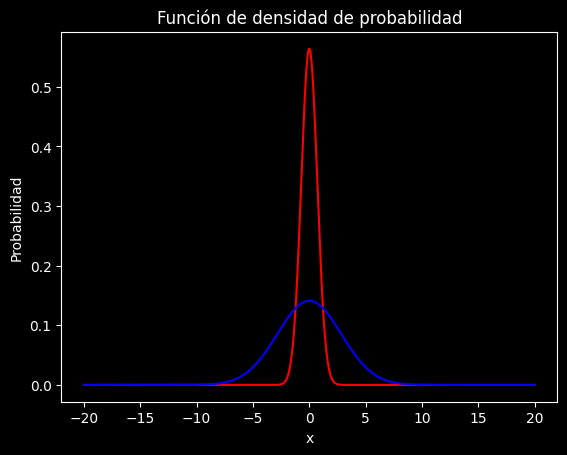

In [30]:
fig = plt.figure()
plt.plot(x1, probability_density_function(psi_x1), "r", label = "Onda 1")
plt.plot(x2, probability_density_function(psi_x2), "b", label = "Onda 2")
plt.xlabel("x")
plt.ylabel("Probabilidad")
plt.title("Función de densidad de probabilidad")
plt.show()

b) El espacio de momentos $\phi(p)$ es una función tal que $ \ Q(p) = \phi(p)\times\phi(p)* \ $ corresponde a la probabilidad de que el momentum de una particula sea $p$. El espacio de momentos se puede obtener al realizar la transformada de Fourier del espacio de posiciones,

$$
  \phi(p) = \frac{1}{\sqrt{2\piħ}}\int{\psi(x)\exp{(\frac{-ipx}{ħ})\,dx}}
$$

Gráfique en un mismo gráfico las densidades de probabilidad de las dos funciones de momentos, es decir, $p_1 \ \text{vs} \ Q_1(p_1)$ y $p_2 \ \text{vs} \ Q_2(p_2)$ entre $[-20, 20]$ con 500 puntos en $p$.

In [31]:
p1 = np.fft.fft(psi_x1)
p2 = np.fft.fft(psi_x2)

f1 = np.fft.fftfreq(len(psi_x1))
f2 = np.fft.fftfreq(len(psi_x2))

Q1 = p1 * np.conj(p1)
Q2 = p2 * np.conj(p2)

/home/ramsus/anaconda3/envs/metodos_2/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


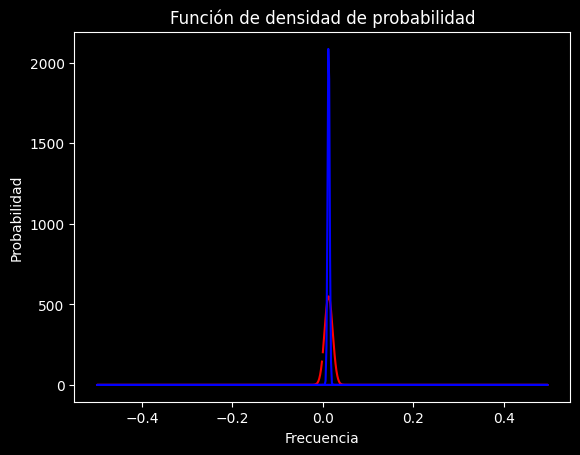

In [32]:
fig = plt.figure()
plt.plot(f1, Q1, "r", label = "Onda 1")
plt.plot(f2, Q2, "b", label = "Onda 2")
plt.xlabel("Frecuencia")
plt.ylabel("Probabilidad")
plt.title("Función de densidad de probabilidad")
plt.show()

c) Imprima los dos escalares que corresponden al valor esperado de los momentos para las dos funciones de onda.


In [33]:
Q1_t = np.fft.ifft(Q1) * np.exp(1j * np.angle(p1))
Q2_t = np.fft.ifft(Q2) * np.exp(1j * np.angle(p2))

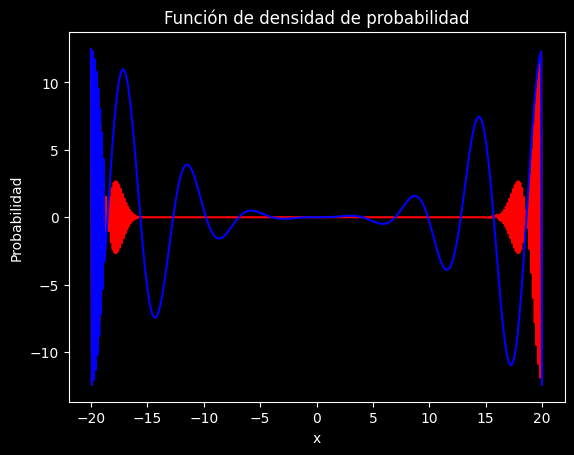

In [34]:
fig = plt.figure()
plt.plot(x1, Q1_t, "r", label = "Onda 1")
plt.plot(x2, Q2_t, "b", label = "Onda 2")
plt.xlabel("x")
plt.ylabel("Probabilidad")
plt.title("Función de densidad de probabilidad")
plt.show()


d) Qué significa físicamente la relación entre el ancho de los gráficos de las partes a y b? (No se califica)

Su texto aquí

.

.

.

.

.

.

e) Realice una simulación mostrando la evolución temporal en el espacio de posiciones de la primera ecuación de onda $\psi_1(x)$ entre $[-20, 20]$.

La simulación debe generarse de forma automatica en el jupyter notebook en el binder del curso, y no debe demorar más de 30 segundos en generarse,

Para ello tome los siguientes parametros $t$ entre $[0, 10]$ con 100 puntos, y la simulación con $100$ frames.

Para asegurarse puede subir un link de youtube de su simulación.

La simulación debería verse parecida al siguiente video.

.

Cambie por su link aquí

https://youtu.be/htkWqg9aG4c

.

.

/home/ramsus/anaconda3/envs/metodos_2/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


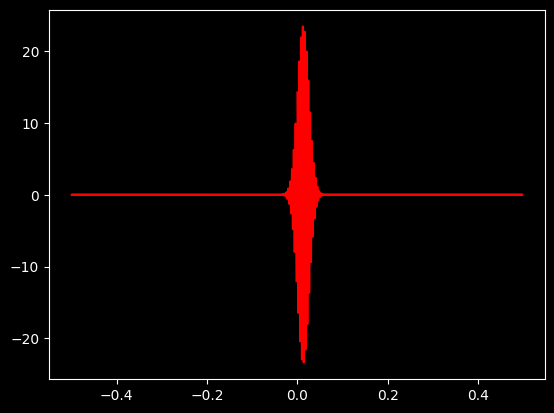

f) Qué interpretación física puede extraer del ejercicio? (No se califica)

Su texto aqui,

.

.

.

.
